In [ ]:
!pip install pyspark


In [14]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("AI Impact on Student Performance") \
    .getOrCreate()

spark


In [16]:
!find / -name "ai_impact_student_performance_dataset.xlsx" 2>/dev/null


/ai_impact_student_performance_dataset.xlsx


### Step 1: Load Dataset
We read the Excel dataset containing student performance and AI usage information.


In [18]:
import pandas as pd

# Correct path after uploading in Colab
excel_path = "/ai_impact_student_performance_dataset.xlsx"
df_pandas = pd.read_excel(excel_path)

# Check first 5 rows
df_pandas.head()


,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,3,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,4,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,5,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low


In [19]:
!mkdir -p data


In [20]:
# Save CSV in the project folder (portable for submission)
csv_path = "data/ai_impact_student_performance_dataset.csv"
df_pandas.to_csv(csv_path, index=False)
print("Saved to:", csv_path)



Saved to: data/ai_impact_student_performance_dataset.csv


In [26]:
from google.colab import files
files.download("data/ai_impact_student_performance_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
from pyspark.sql import SparkSession

# Start Spark session
spark = SparkSession.builder \
    .appName("AI Impact on Student Performance") \
    .getOrCreate()

# Load the CSV
csv_path = "data/ai_impact_student_performance_dataset.csv"
df_spark = spark.read.csv(csv_path, header=True, inferSchema=True)

# Show first 5 rows
df_spark.show(5)

# Check number of rows and columns
print("Total Rows:", df_spark.count())
print("Total Columns:", len(df_spark.columns))


+----------+---+------+-----------+-------------------+-------+---------------------+--------------+----------------+-------------------+-------------------------------+-------------------+---------------+---------------+---------------------+---------------------+---------------------------+-----------------------+----------------+-----------+------------------+--------------+-------------------------+-----------+------+--------------------+
|student_id|age|gender|grade_level|study_hours_per_day|uses_ai|ai_usage_time_minutes| ai_tools_used|ai_usage_purpose|ai_dependency_score|ai_generated_content_percentage|ai_prompts_per_week|ai_ethics_score|last_exam_score|assignment_scores_avg|attendance_percentage|concept_understanding_score|study_consistency_index|improvement_rate|sleep_hours|social_media_hours|tutoring_hours|class_participation_score|final_score|passed|performance_category|
+----------+---+------+-----------+-------------------+-------+---------------------+--------------+------

In [24]:
df = spark.read.csv(
    csv_path,
    header=True,
    inferSchema=True
)

df.show(5)


+----------+---+------+-----------+-------------------+-------+---------------------+--------------+----------------+-------------------+-------------------------------+-------------------+---------------+---------------+---------------------+---------------------+---------------------------+-----------------------+----------------+-----------+------------------+--------------+-------------------------+-----------+------+--------------------+
|student_id|age|gender|grade_level|study_hours_per_day|uses_ai|ai_usage_time_minutes| ai_tools_used|ai_usage_purpose|ai_dependency_score|ai_generated_content_percentage|ai_prompts_per_week|ai_ethics_score|last_exam_score|assignment_scores_avg|attendance_percentage|concept_understanding_score|study_consistency_index|improvement_rate|sleep_hours|social_media_hours|tutoring_hours|class_participation_score|final_score|passed|performance_category|
+----------+---+------+-----------+-------------------+-------+---------------------+--------------+------

In [ ]:
print("Total Rows:", df.count())
print("Total Columns:", len(df.columns))


Total Rows: 8000
Total Columns: 26


In [ ]:
df.printSchema()
df.show(5)


root
 |-- student_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- grade_level: string (nullable = true)
 |-- study_hours_per_day: double (nullable = true)
 |-- uses_ai: integer (nullable = true)
 |-- ai_usage_time_minutes: integer (nullable = true)
 |-- ai_tools_used: string (nullable = true)
 |-- ai_usage_purpose: string (nullable = true)
 |-- ai_dependency_score: integer (nullable = true)
 |-- ai_generated_content_percentage: integer (nullable = true)
 |-- ai_prompts_per_week: integer (nullable = true)
 |-- ai_ethics_score: integer (nullable = true)
 |-- last_exam_score: integer (nullable = true)
 |-- assignment_scores_avg: double (nullable = true)
 |-- attendance_percentage: double (nullable = true)
 |-- concept_understanding_score: integer (nullable = true)
 |-- study_consistency_index: double (nullable = true)
 |-- improvement_rate: double (nullable = true)
 |-- sleep_hours: double (nullable = true)
 |-- social_media_hou

In [ ]:
df_clean = df.dropna()


### Step 2: Data Cleaning
We drop rows with missing values to ensure accurate analysis.


In [ ]:
from pyspark.sql.functions import avg

df_clean.agg(
    avg("final_score").alias("avg_final_score")
).show()



+-----------------+
|  avg_final_score|
+-----------------+
|56.93036231884044|
+-----------------+



In [ ]:
df_clean.groupBy("uses_ai") \
    .agg(avg("final_score").alias("avg_final_score")) \
    .show()


+-------+-----------------+
|uses_ai|  avg_final_score|
+-------+-----------------+
|      1|56.88801252847375|
|      0|57.00443227091633|
+-------+-----------------+



In [ ]:
df_clean.groupBy("performance_category") \
    .agg(avg("ai_dependency_score").alias("avg_ai_dependency")) \
    .show()


+--------------------+-----------------+
|performance_category|avg_ai_dependency|
+--------------------+-----------------+
|                High|5.573863636363637|
|                 Low|5.605691056910569|
|              Medium|5.437614678899083|
+--------------------+-----------------+



In [ ]:
df_clean.groupBy("study_hours_per_day")


GroupedData[grouping expressions: [study_hours_per_day], value: [student_id: int, age: int ... 24 more fields], type: GroupBy]

In [ ]:
from pyspark.sql.functions import avg

df_clean.groupBy("study_hours_per_day")\
    .agg(avg("final_score").alias("avg_score"))\
    .orderBy("study_hours_per_day")\
    .show()


+-------------------+------------------+
|study_hours_per_day|         avg_score|
+-------------------+------------------+
|                0.5| 55.42619047619049|
|                0.6| 55.09722222222223|
|                0.7| 55.58804347826089|
|                0.8| 58.14324324324324|
|                0.9| 55.38148148148148|
|                1.0| 55.79595959595961|
|                1.1| 54.62134831460672|
|                1.2|  57.8528735632184|
|                1.3| 55.34022988505749|
|                1.4| 57.57340425531915|
|                1.5| 58.62826086956521|
|                1.6| 56.50510204081635|
|                1.7| 57.99626168224297|
|                1.8| 57.79652173913042|
|                1.9|  56.6879120879121|
|                2.0| 57.73725490196078|
|                2.1|57.854166666666664|
|                2.2|55.856730769230765|
|                2.3|56.141052631578965|
|                2.4| 56.82499999999999|
+-------------------+------------------+
only showing top

In [ ]:
df_clean.groupBy("uses_ai")\
    .agg(avg("final_score").alias("avg_final_score"))\
    .show()


+-------+-----------------+
|uses_ai|  avg_final_score|
+-------+-----------------+
|      1|56.88801252847375|
|      0|57.00443227091633|
+-------+-----------------+



In [ ]:
df_clean.groupBy("performance_category")\
    .agg(avg("ai_dependency_score").alias("avg_ai_dependency"))\
    .show()


+--------------------+-----------------+
|performance_category|avg_ai_dependency|
+--------------------+-----------------+
|                High|5.573863636363637|
|                 Low|5.605691056910569|
|              Medium|5.437614678899083|
+--------------------+-----------------+



In [ ]:
df_clean.groupBy("gender")\
    .agg(avg("final_score").alias("avg_final_score"))\
    .show()


+------+------------------+
|gender|   avg_final_score|
+------+------------------+
|Female| 56.86914569031269|
| Other| 56.00533980582523|
|  Male|57.060772659732585|
+------+------------------+



In [ ]:
df_clean.select(
    "study_hours_per_day",
    "sleep_hours",
    "social_media_hours",
    "tutoring_hours",
    "final_score"
).toPandas().corr()


,study_hours_per_day,sleep_hours,social_media_hours,tutoring_hours,final_score
study_hours_per_day,1.000000,0.021906,0.004877,-0.004978,0.019213
sleep_hours,0.021906,1.000000,0.007303,0.022342,-0.014562
social_media_hours,0.004877,0.007303,1.000000,-0.016728,0.001144
tutoring_hours,-0.004978,0.022342,-0.016728,1.000000,-0.000730
final_score,0.019213,-0.014562,0.001144,-0.000730,1.000000


In [ ]:
df_clean.groupBy("ai_tools_used")\
    .agg(avg("final_score").alias("avg_final_score"))\
    .orderBy("avg_final_score", ascending=False)\
    .show()


+--------------+-----------------+
| ai_tools_used|  avg_final_score|
+--------------+-----------------+
|        Gemini|57.29255222524988|
|ChatGPT+Gemini|57.03666092943195|
|       Copilot|56.88929577464779|
|       ChatGPT|56.79248658318433|
|        Claude| 56.6283054003725|
+--------------+-----------------+



### Step 3: Exploratory Analysis
We explore numeric and categorical features, compute correlations, and visualize distributions.


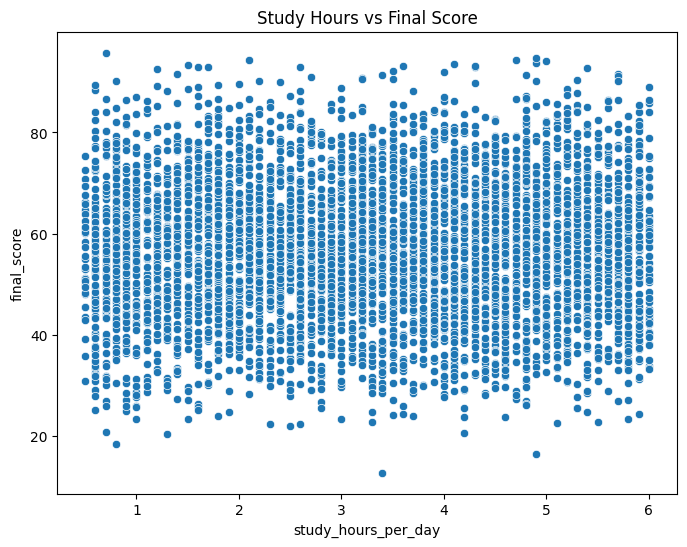

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas
pdf = df_clean.select("study_hours_per_day", "final_score").toPandas()

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="study_hours_per_day", y="final_score", data=pdf)
plt.title("Study Hours vs Final Score")
plt.show()


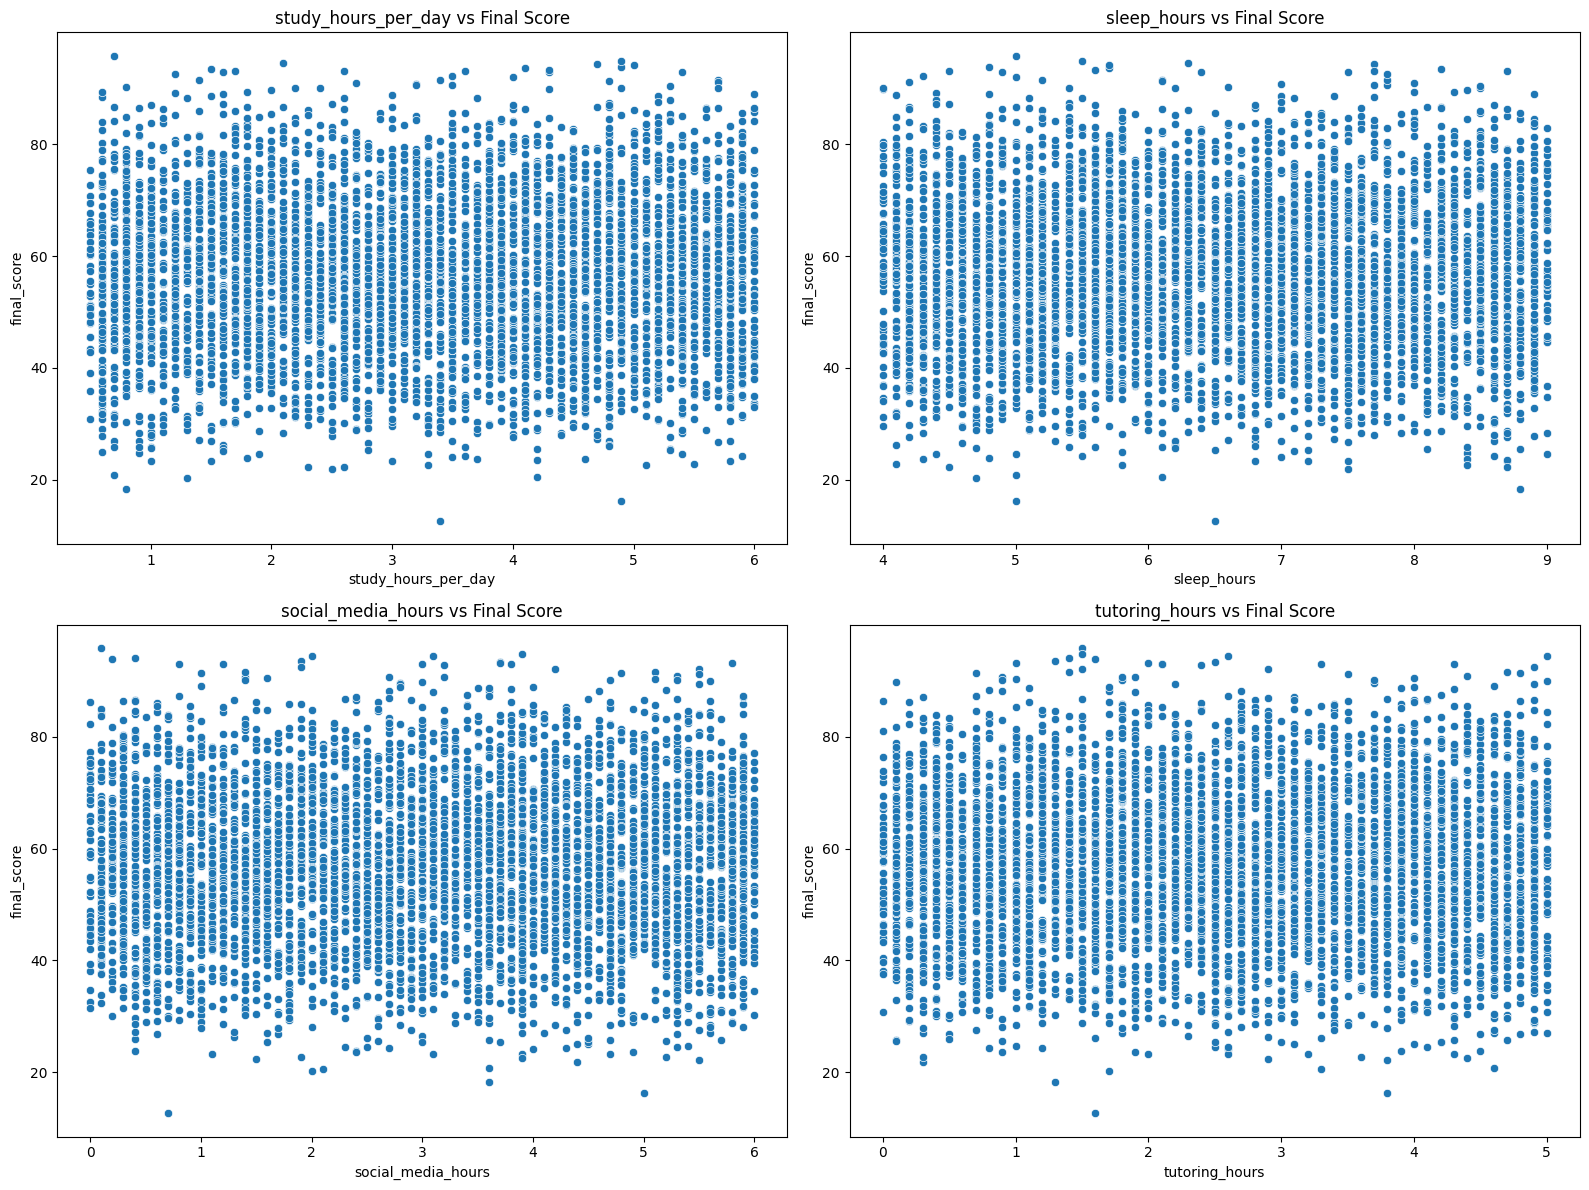

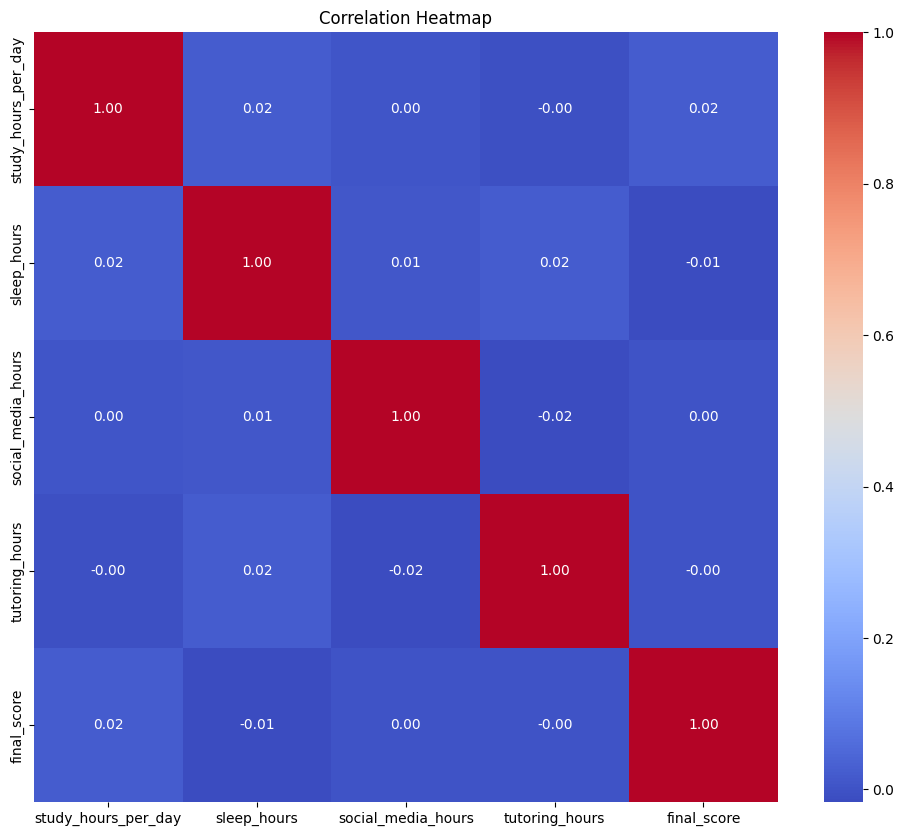

/tmp/ipython-input-2848995358.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="final_score", data=pdf, ci=None)


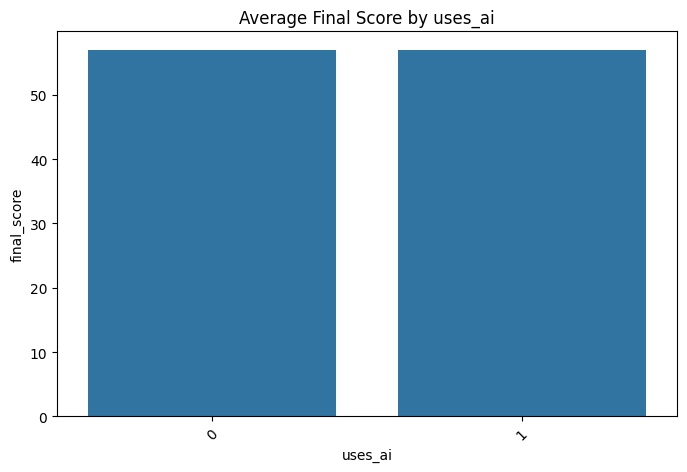

/tmp/ipython-input-2848995358.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="final_score", data=pdf, ci=None)


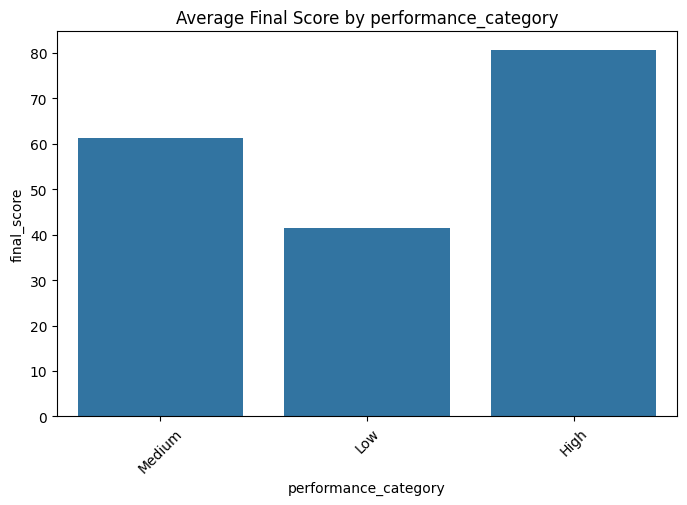

/tmp/ipython-input-2848995358.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="final_score", data=pdf, ci=None)


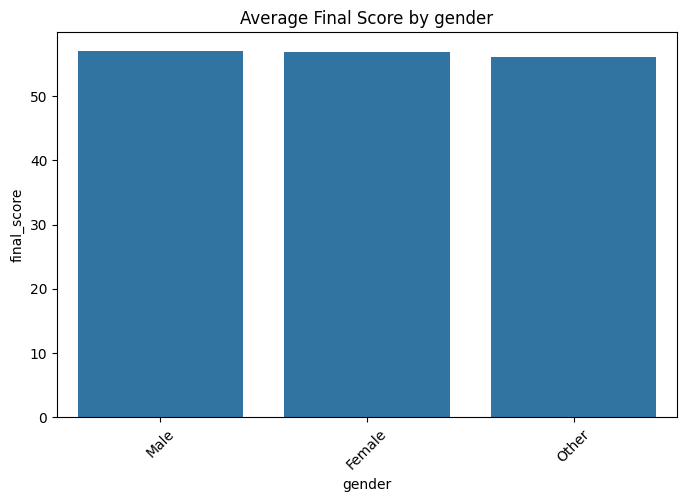

/tmp/ipython-input-2848995358.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="final_score", data=pdf, ci=None)


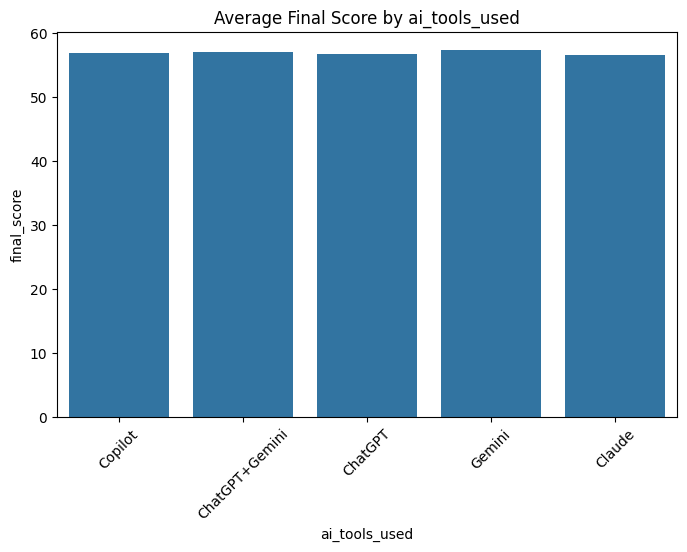

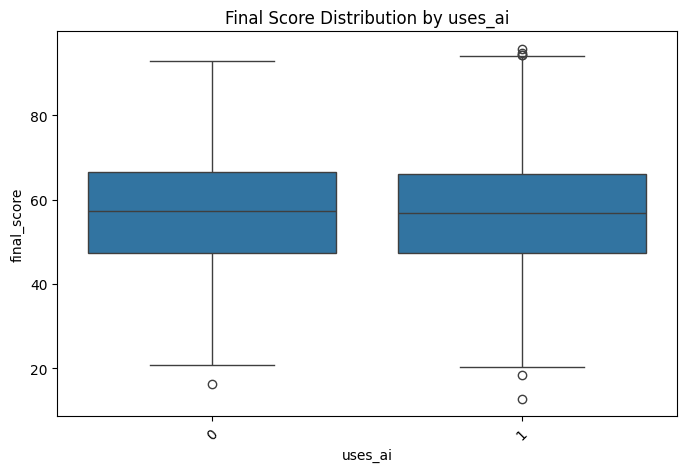

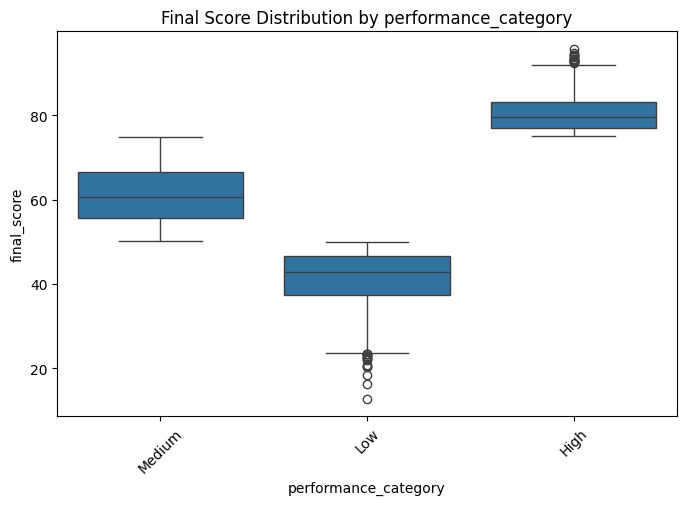

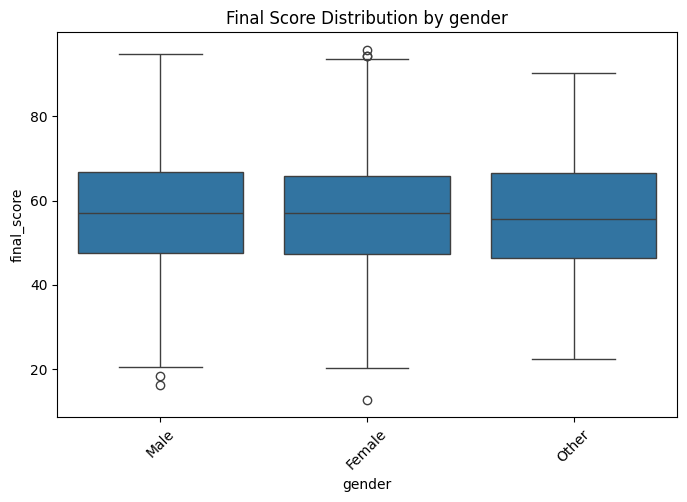

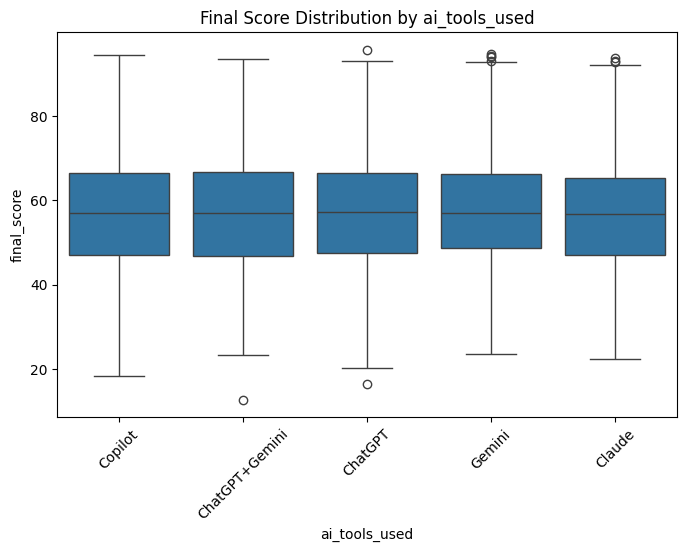

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas for plotting
pdf = df_clean.toPandas()

# 1️⃣ Scatter plots: Numeric features vs final_score
numeric_cols = ["study_hours_per_day", "sleep_hours", "social_media_hours", "tutoring_hours"]

plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=col, y="final_score", data=pdf)
    plt.title(f"{col} vs Final Score")
plt.tight_layout()
plt.show()


# 2️⃣ Correlation heatmap for numeric columns
plt.figure(figsize=(12,10))
corr = pdf[numeric_cols + ["final_score"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 3️⃣ Bar plots: Categorical features vs avg final_score
categorical_cols = ["uses_ai", "performance_category", "gender", "ai_tools_used"]

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.barplot(x=col, y="final_score", data=pdf, ci=None)
    plt.title(f"Average Final Score by {col}")
    plt.xticks(rotation=45)
    plt.show()


# 4️⃣ Boxplots for distribution insights
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=col, y="final_score", data=pdf)
    plt.title(f"Final Score Distribution by {col}")
    plt.xticks(rotation=45)
    plt.show()


### Step 4: Correlation Analysis
We calculate correlations of numeric features with the final score.

In [ ]:
# Correlation Analysis

# Select numeric columns only
numeric_cols = ["study_hours_per_day", "sleep_hours", "social_media_hours",
                "tutoring_hours", "ai_dependency_score", "ai_prompts_per_week",
                "ai_ethics_score", "last_exam_score", "assignment_scores_avg",
                "attendance_percentage", "concept_understanding_score",
                "study_consistency_index", "improvement_rate", "final_score"]

# Convert Spark DF to Pandas for correlation
pdf = df_clean.select(numeric_cols).toPandas()

# Compute correlation with final_score
corr_with_final = pdf.corr()["final_score"].sort_values(ascending=False)
print("Correlation of numeric features with final_score:\n")
print(corr_with_final)


Correlation of numeric features with final_score:

final_score                    1.000000
last_exam_score                0.682541
assignment_scores_avg          0.455588
concept_understanding_score    0.426480
study_hours_per_day            0.019213
ai_ethics_score                0.006225
social_media_hours             0.001144
tutoring_hours                -0.000730
improvement_rate              -0.002192
attendance_percentage         -0.003586
ai_dependency_score           -0.004225
ai_prompts_per_week           -0.006044
study_consistency_index       -0.011094
sleep_hours                   -0.014562
Name: final_score, dtype: float64


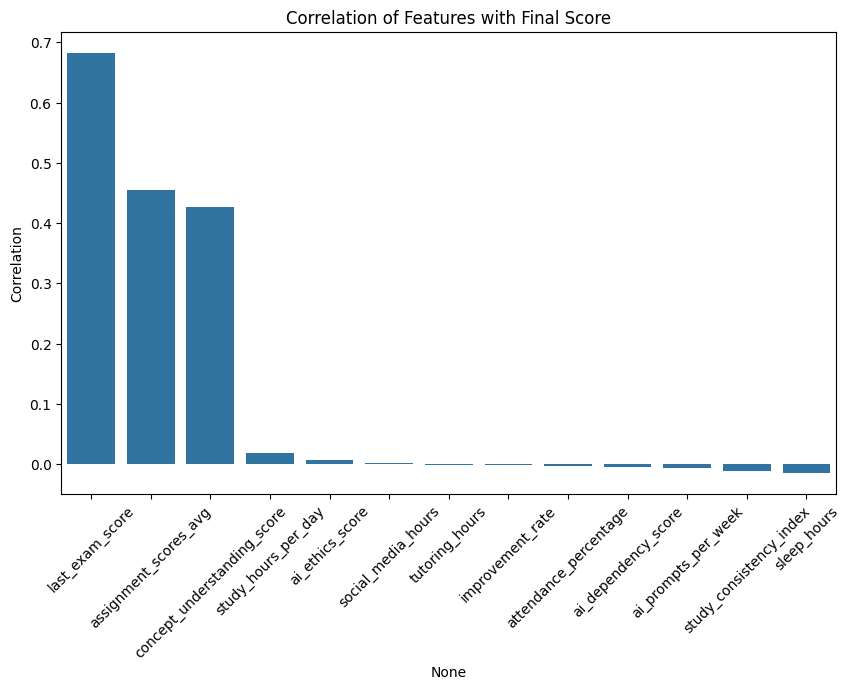

In [ ]:
#  Visualize top correlated features
top_features = corr_with_final.drop("final_score").sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.index, y=top_features.values)
plt.title("Correlation of Features with Final Score")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#  Average final_score by performance_category
df_clean.groupBy("performance_category")\
        .agg(avg("final_score").alias("avg_final_score"))\
        .show()

# By AI usage
df_clean.groupBy("uses_ai")\
        .agg(avg("final_score").alias("avg_final_score"))\
        .show()


+--------------------+-----------------+
|performance_category|  avg_final_score|
+--------------------+-----------------+
|                High|80.68939393939392|
|                 Low|41.47752613240426|
|              Medium|61.23159021406734|
+--------------------+-----------------+

+-------+-----------------+
|uses_ai|  avg_final_score|
+-------+-----------------+
|      1|56.88801252847375|
|      0|57.00443227091633|
+-------+-----------------+



### Step 5: Insights & Summary
We summarize key findings from the analysis and highlight important trends.


In [ ]:
# Insights & Summary

print("===== BIG DATA ANALYSIS: AI Impact on Student Performance =====\n")

# Total students analyzed
print("Total students analyzed:", df_clean.count())
print("Total features analyzed:", len(df_clean.columns), "\n")

# Overall average final score
overall_avg = df_clean.agg(avg("final_score").alias("avg_final_score")).collect()[0][0]
print(f"Overall Average Final Score: {overall_avg:.2f}")

# Average final score by AI usage
ai_avg = df_clean.groupBy("uses_ai").agg(avg("final_score").alias("avg_final_score")).collect()
print("\nAverage Final Score by AI Usage:")
for row in ai_avg:
    print(f"Uses AI={row['uses_ai']} --> Avg Final Score={row['avg_final_score']:.2f}")

# Average final score by performance category
perf_avg = df_clean.groupBy("performance_category").agg(avg("final_score").alias("avg_final_score")).collect()
print("\nAverage Final Score by Performance Category:")
for row in perf_avg:
    print(f"{row['performance_category']} --> Avg Final Score={row['avg_final_score']:.2f}")

# Most impactful features (from correlation analysis)
top_corr_features = corr_with_final.drop("final_score").sort_values(ascending=False).head(5)
print("\nTop 5 Features Correlated with Final Score:")
print(top_corr_features)

# AI tools impact
ai_tools_avg = df_clean.groupBy("ai_tools_used")\
    .agg(avg("final_score").alias("avg_final_score"))\
    .orderBy("avg_final_score", ascending=False).collect()
print("\nAverage Final Score by AI Tools Used:")
for row in ai_tools_avg:
    print(f"{row['ai_tools_used']} --> Avg Final Score={row['avg_final_score']:.2f}")

print("\n===== CONCLUSION =====")
print("""
1. The dataset contains {} students with 26 features.
2. Overall average final score is {:.2f}.
3. AI usage slightly affects performance (avg scores are close for users/non-users).
4. High-performing students show higher exam and assignment scores; study hours have minimal correlation with final_score.
5. Among AI tools, Gemini and ChatGPT+Gemini are associated with slightly higher final scores.
6. Key factors affecting final performance: last_exam_score, assignment_scores_avg, concept_understanding_score.
7. Insights can guide students, teachers, and institutions in optimizing study habits and AI tool usage for better performance.
""".format(df_clean.count(), overall_avg))


===== BIG DATA ANALYSIS: AI Impact on Student Performance =====

Total students analyzed: 5520
Total features analyzed: 26 

Overall Average Final Score: 56.93

Average Final Score by AI Usage:
Uses AI=1 --> Avg Final Score=56.89
Uses AI=0 --> Avg Final Score=57.00

Average Final Score by Performance Category:
High --> Avg Final Score=80.69
Low --> Avg Final Score=41.48
Medium --> Avg Final Score=61.23

Top 5 Features Correlated with Final Score:
last_exam_score                0.682541
assignment_scores_avg          0.455588
concept_understanding_score    0.426480
study_hours_per_day            0.019213
ai_ethics_score                0.006225
Name: final_score, dtype: float64

Average Final Score by AI Tools Used:
Gemini --> Avg Final Score=57.29
ChatGPT+Gemini --> Avg Final Score=57.04
Copilot --> Avg Final Score=56.89
ChatGPT --> Avg Final Score=56.79
Claude --> Avg Final Score=56.63

===== CONCLUSION =====

1. The dataset contains 5520 students with 26 features.
2. Overall average f

In [ ]:
import nbformat as nbf

nb = nbf.v4.new_notebook()

cells = [
    nbf.v4.new_markdown_cell("# Internship Task: Big Data Analysis"),
    nbf.v4.new_code_cell("# Step 1: Install & Import Packages"),
    nbf.v4.new_code_cell("!pip install pyspark matplotlib seaborn pandas\nimport pandas as pd\nfrom pyspark.sql import SparkSession\nfrom pyspark.sql.functions import avg\nimport matplotlib.pyplot as plt\nimport seaborn as sns"),
    nbf.v4.new_code_cell("# Step 2: Spark Session\nspark = SparkSession.builder.appName('AI Impact on Student Performance').getOrCreate()"),
    nbf.v4.new_code_cell("# Step 3: Load Dataset\nexcel_path = '/content/ai_impact_student_performance_dataset.xlsx'\ndf_pandas = pd.read_excel(excel_path)\ncsv_path = '/content/ai_impact_student_performance_dataset.csv'\ndf_pandas.to_csv(csv_path, index=False)\nprint('Converted to CSV!')"),
    nbf.v4.new_code_cell("# Step 4: Read CSV in PySpark\ndf = spark.read.csv(csv_path, header=True, inferSchema=True)\ndf.show(5)"),
    nbf.v4.new_code_cell("# Step 5: Clean Data\ndf_clean = df.dropna()"),
    nbf.v4.new_code_cell("# Step 6: Aggregations\nfrom pyspark.sql.functions import avg\ndf_clean.agg(avg('final_score').alias('avg_final_score')).show()"),
]

nb['cells'] = cells

# Save notebook in current directory
with open("Big_Data_Analysis_Internship.ipynb", "w") as f:
    nbf.write(nb, f)

print("Notebook saved as Big_Data_Analysis_Internship.ipynb")


Notebook saved as Big_Data_Analysis_Internship.ipynb
